In [1]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import json
from snudda.utils.load_network_simulation import SnuddaLoadNetworkSimulation

In [2]:
network_path = os.path.join("networks", "ispn_network")
network_file = os.path.join(network_path, "network-synapses.hdf5")

In [3]:
simulations = dict()

In [4]:

for g in glob.glob(os.path.join(network_path, "simulation", "network-voltage.hdf5")):

    name = os.path.basename(g).split(".")[0]
    print(g)
    sns = SnuddaLoadNetworkSimulation(network_simulation_output_file=g, network_path=network_path)
    simulations.update({name : sns})
time = sns.get_time()    

networks/ispn_network/simulation/network-voltage.hdf5
Loading networks/ispn_network/simulation/network-voltage.hdf5


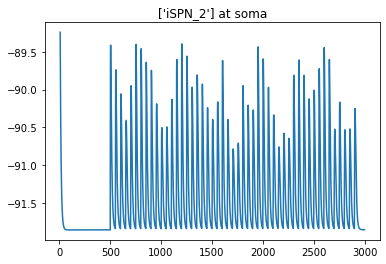

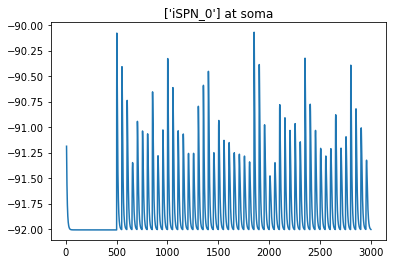

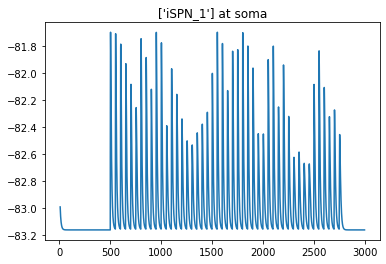

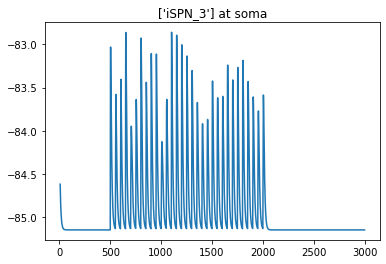

CPU times: user 4.59 s, sys: 431 ms, total: 5.02 s
Wall time: 5.01 s


In [5]:
%%time
for cell_no in range(4):
    
    
    for r, k in enumerate(simulations.keys()):
        sns = simulations[k]
        
        vs = sns.get_voltage(cell_no).T
        v = vs[0]
        plt.figure()
        plt.title(f"{sns.get_neuron_name([cell_no])} at soma")
        start = 300
        plt.plot(time[start:]*1e3,v[start:]*1e3)  
plt.show()

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


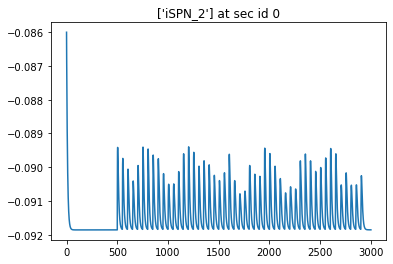

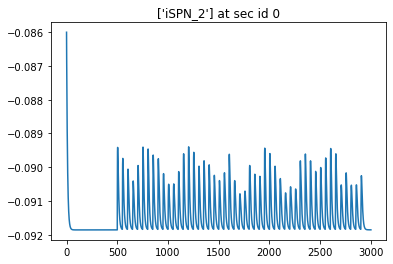

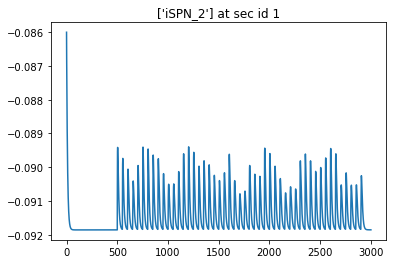

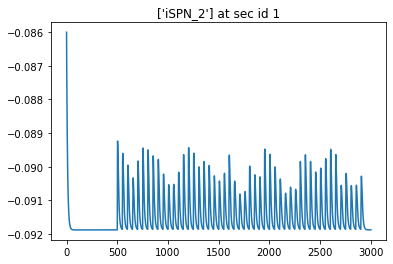

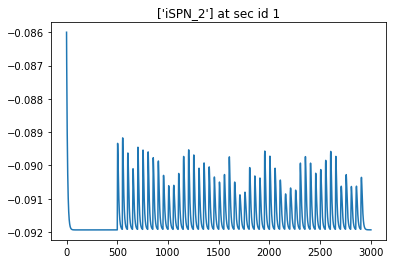

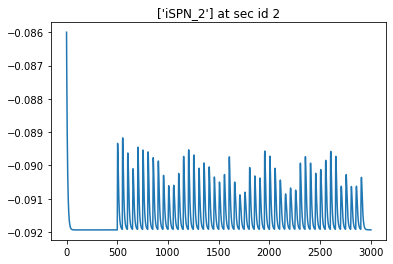

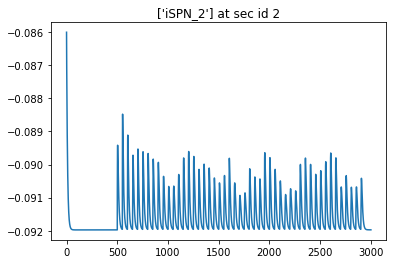

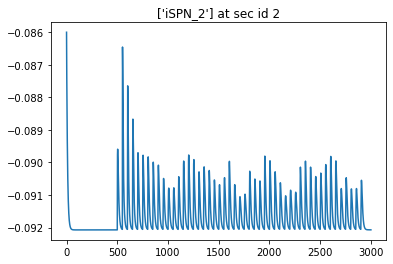

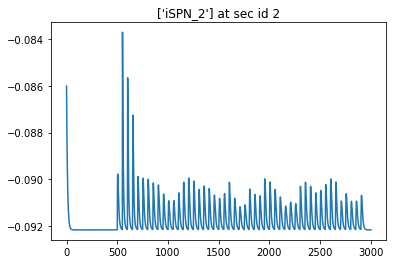

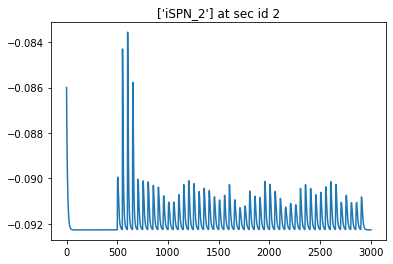

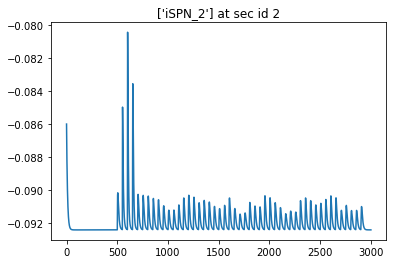

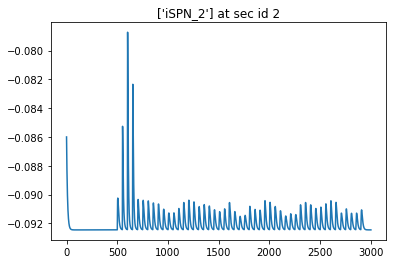

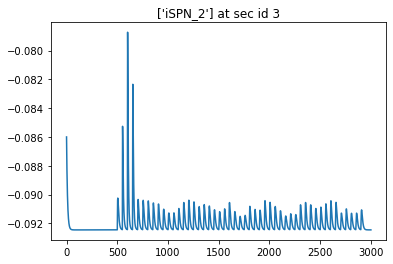

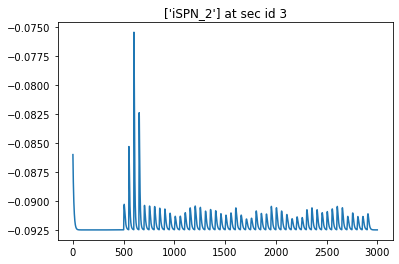

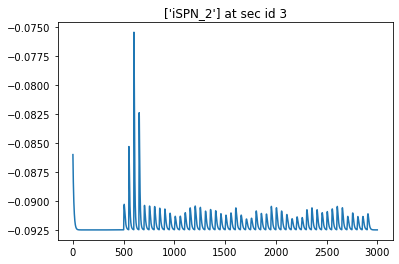

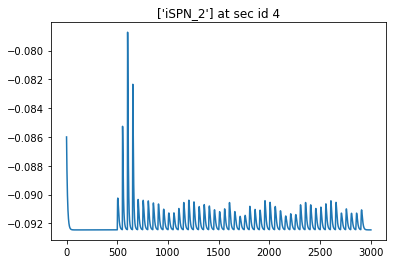

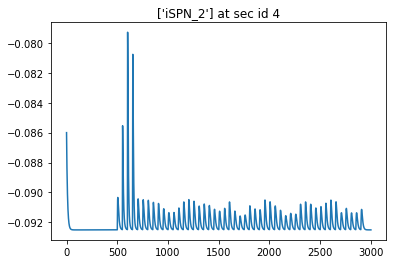

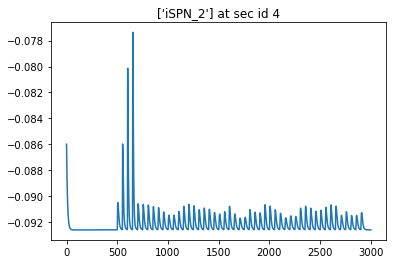

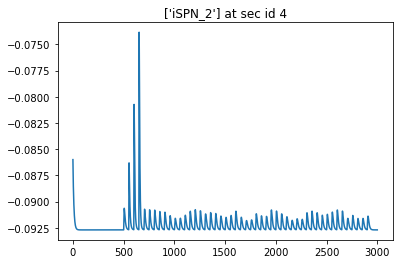

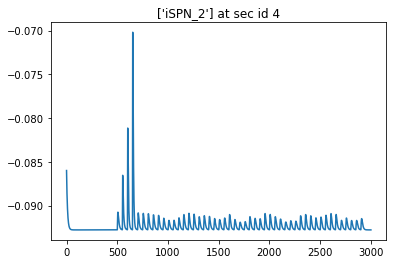

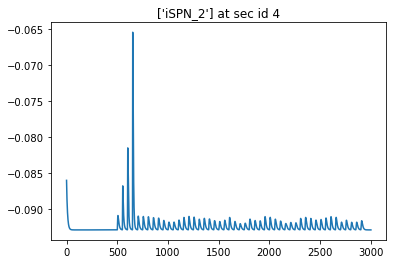

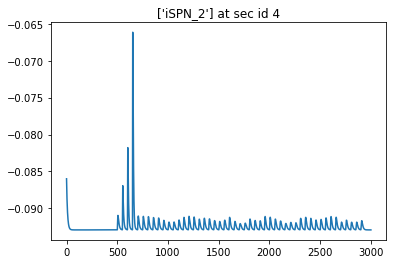

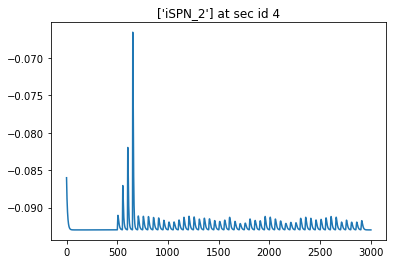

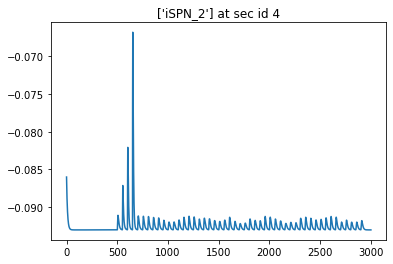

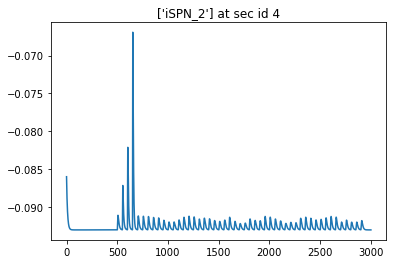

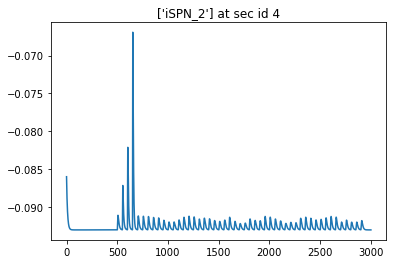

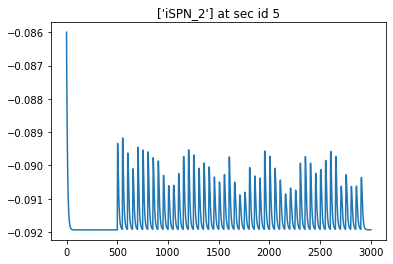

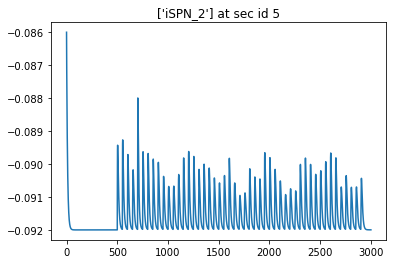

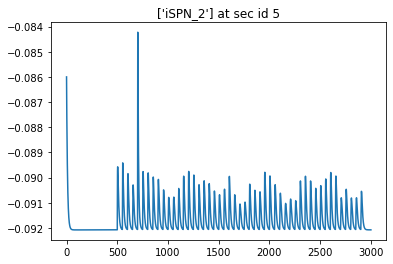

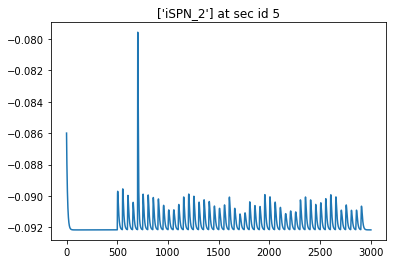

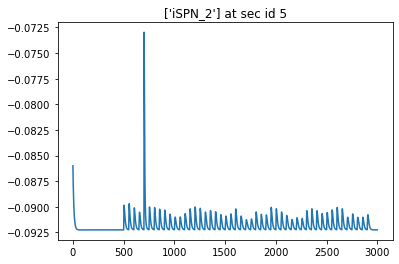

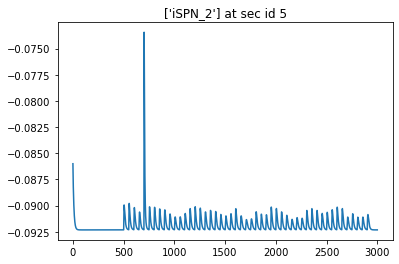

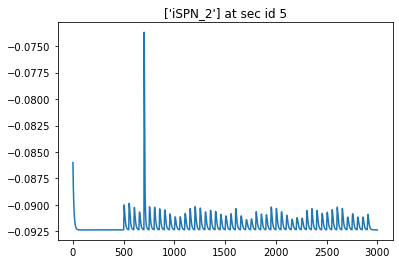

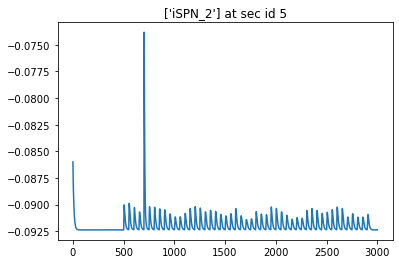

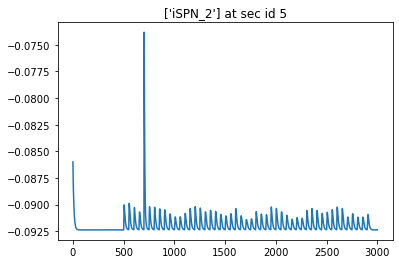

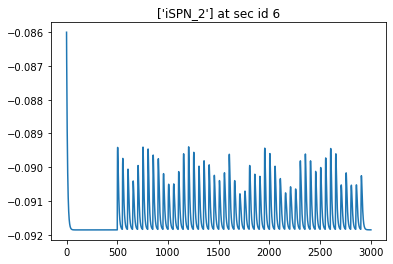

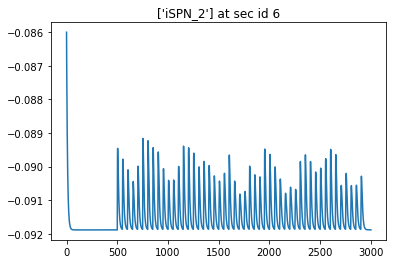

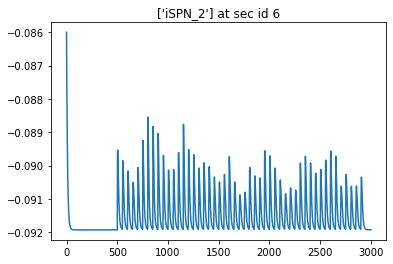

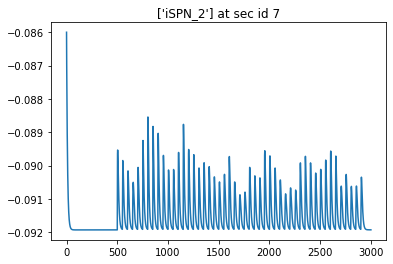

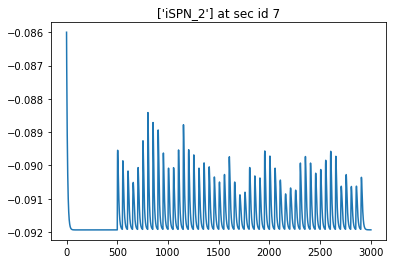

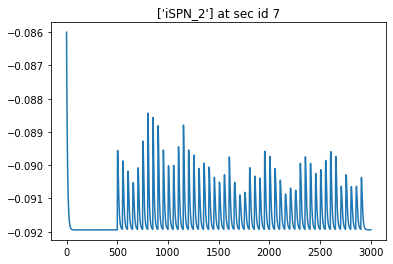

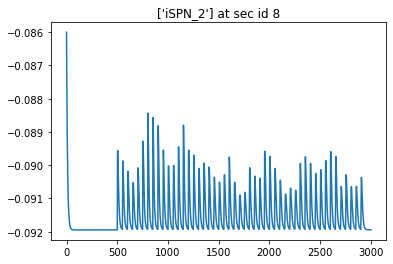

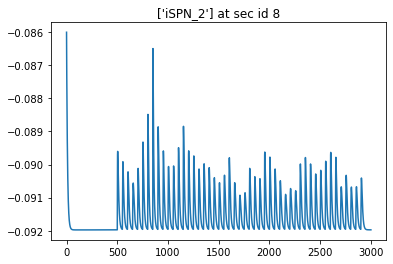

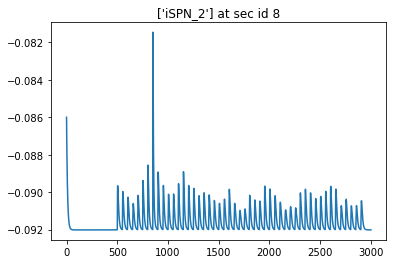

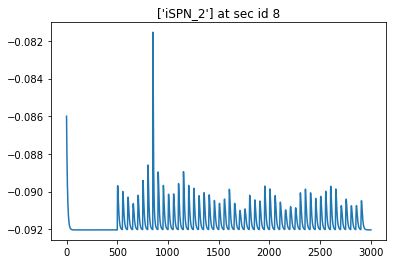

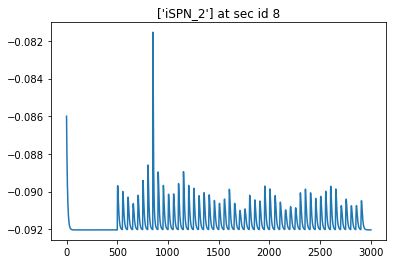

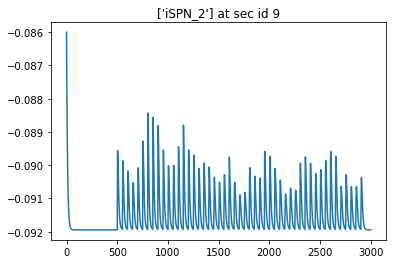

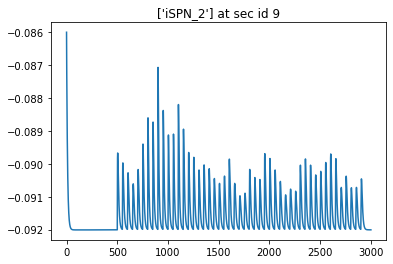

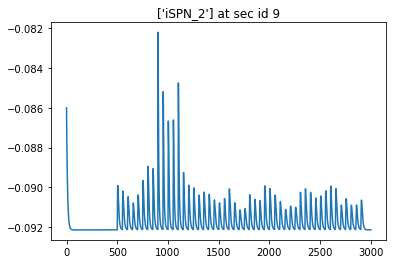

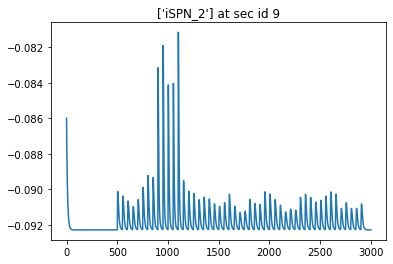

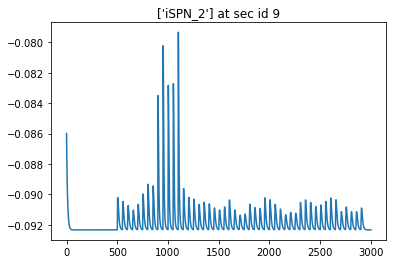

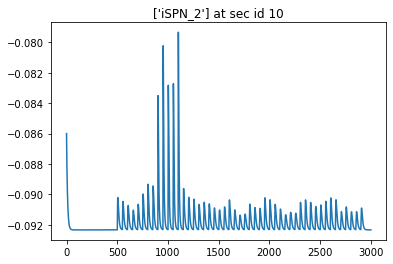

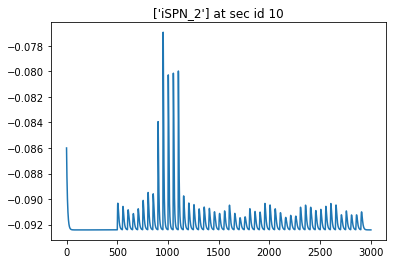

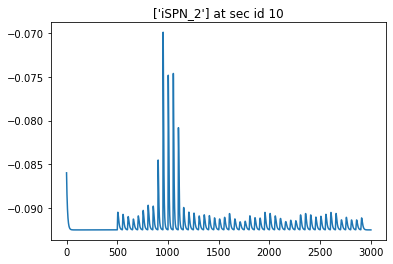

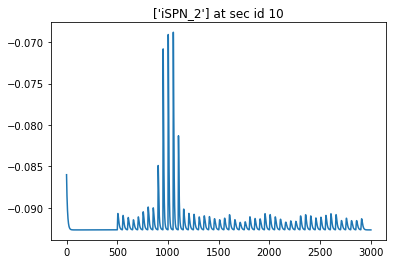

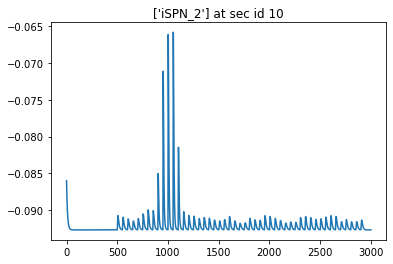

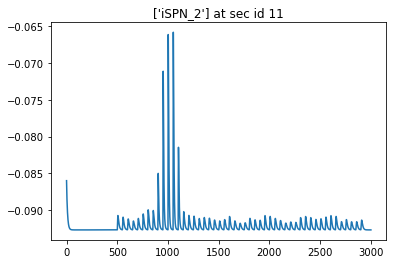

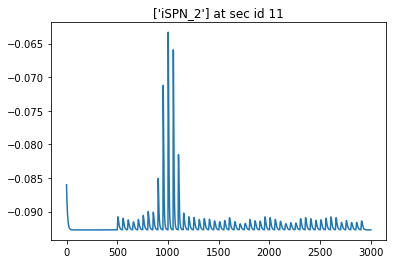

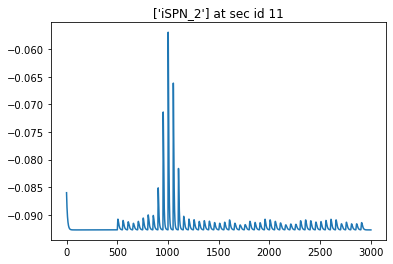

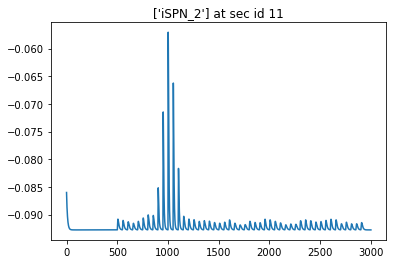

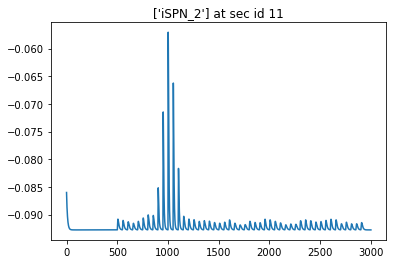

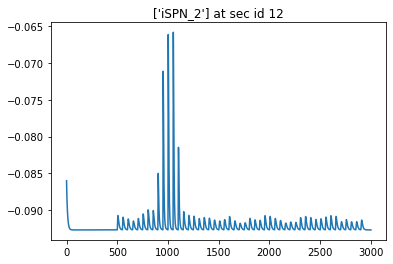

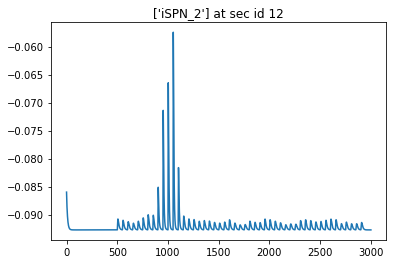

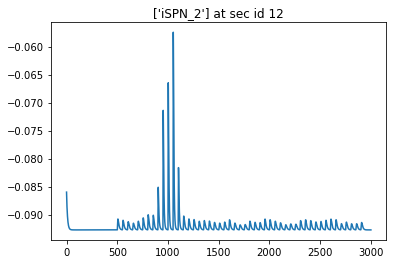

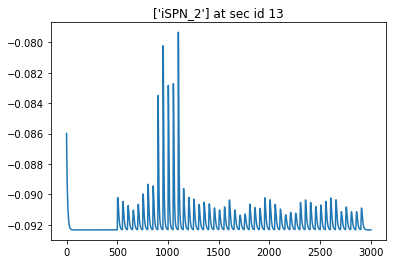

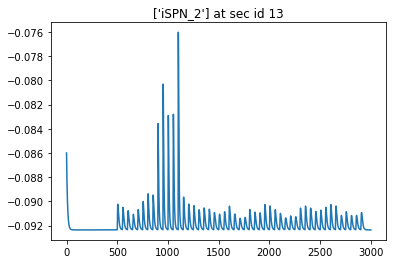

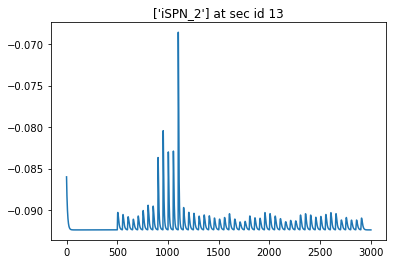

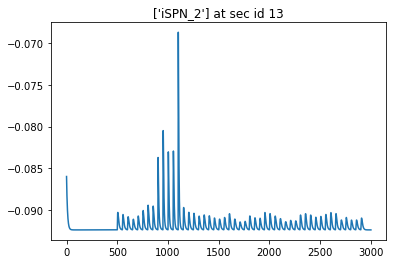

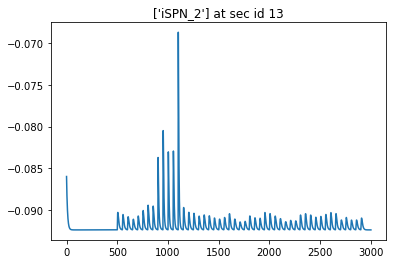

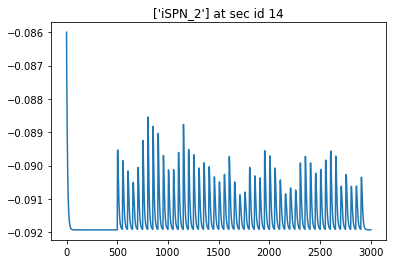

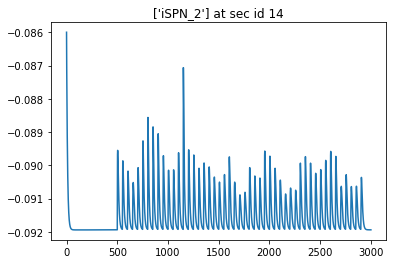

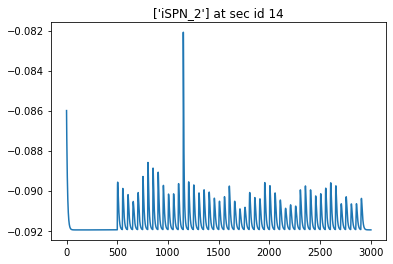

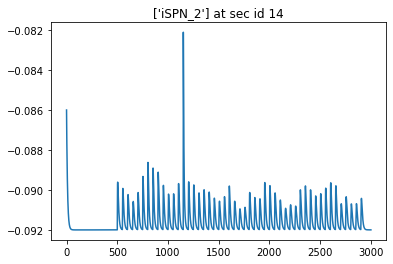

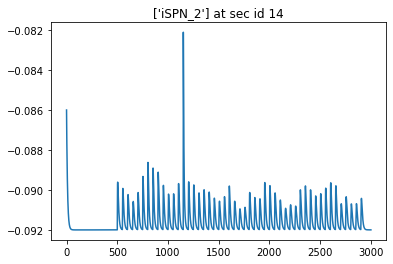

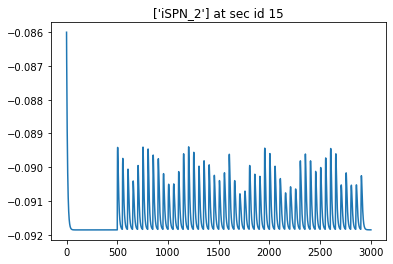

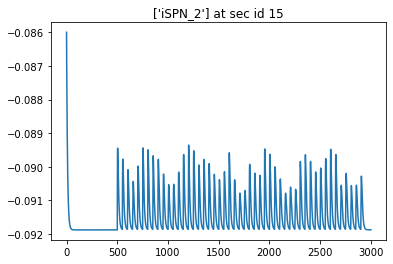

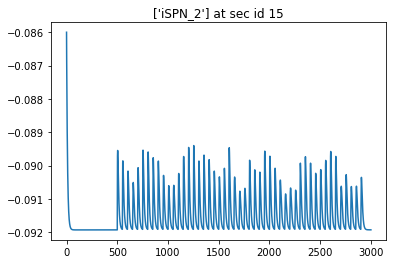

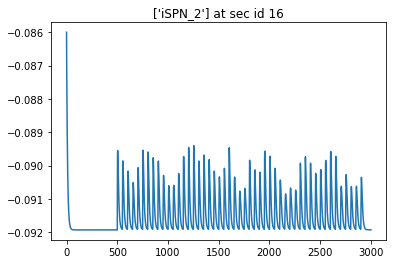

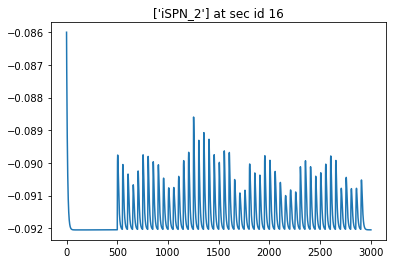

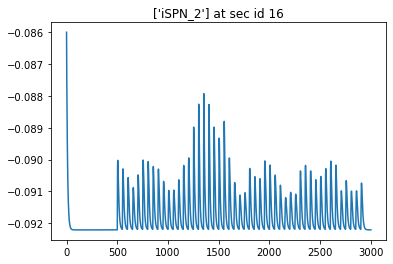

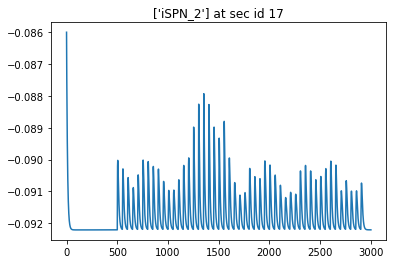

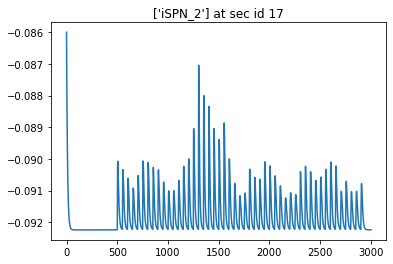

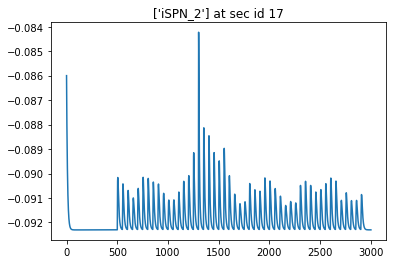

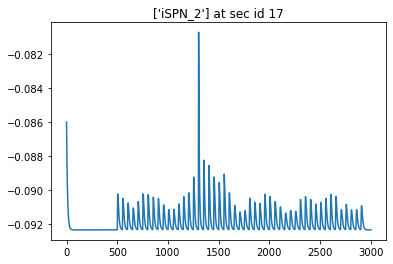

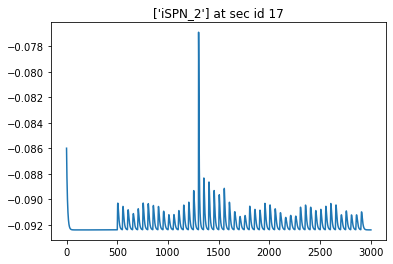

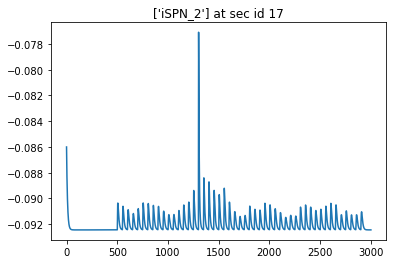

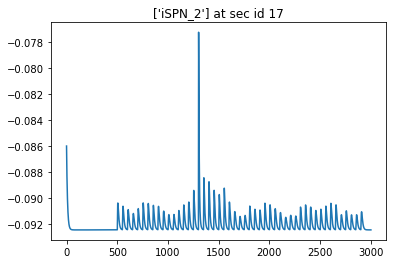

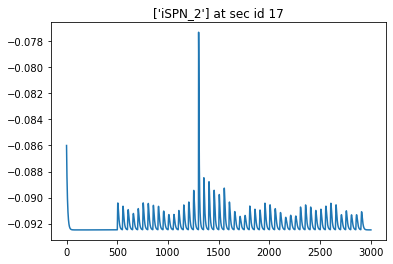

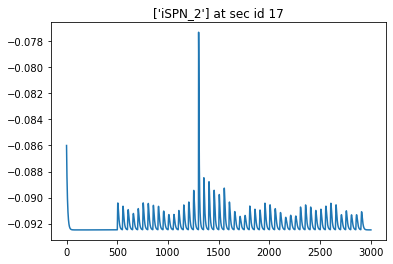

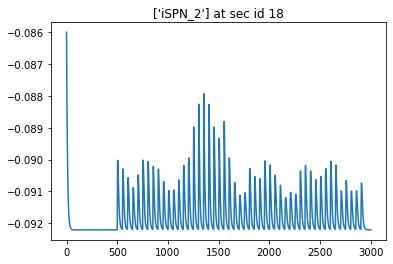

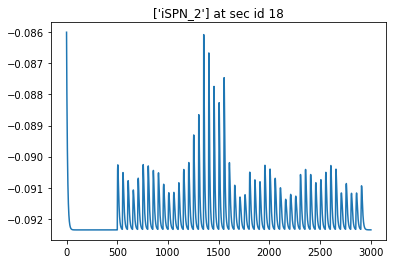

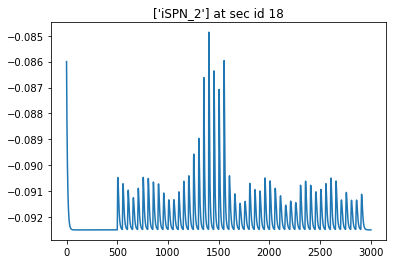

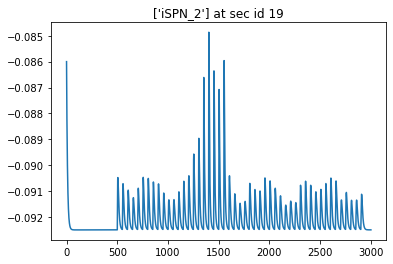

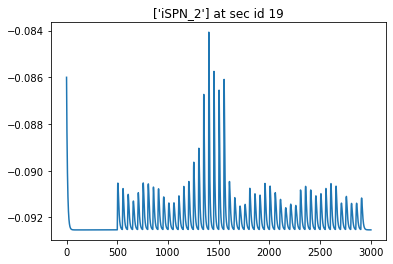

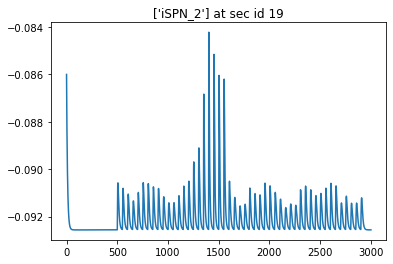

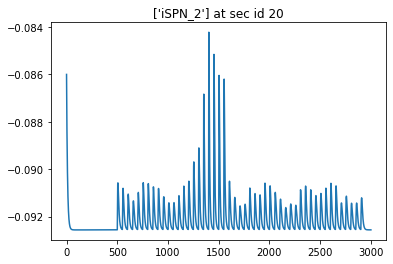

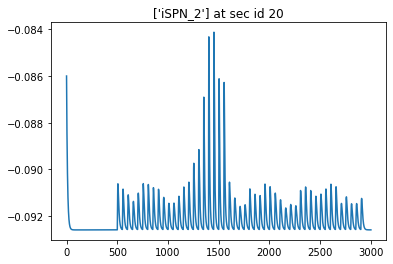

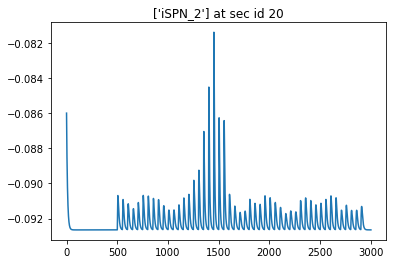

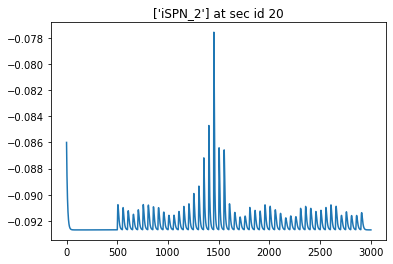

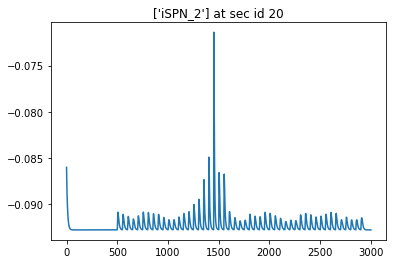

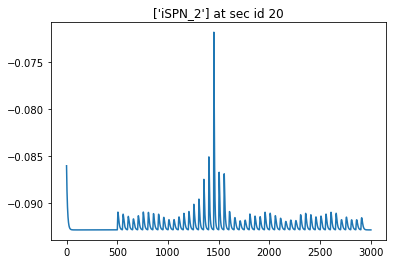

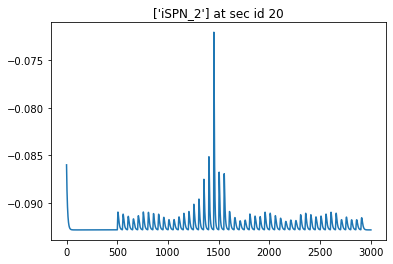

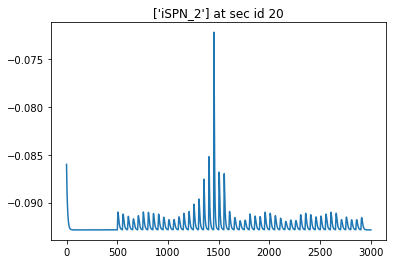

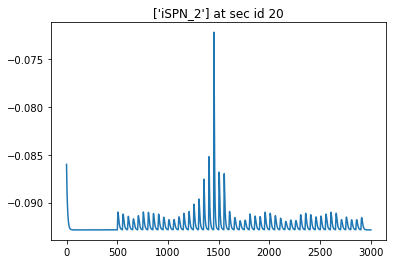

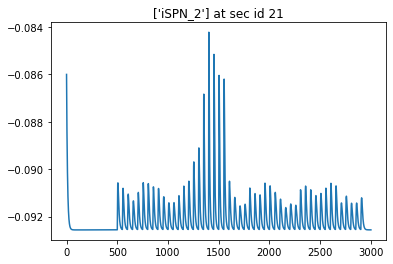

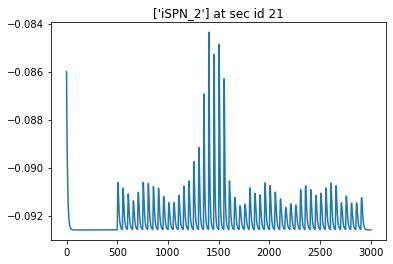

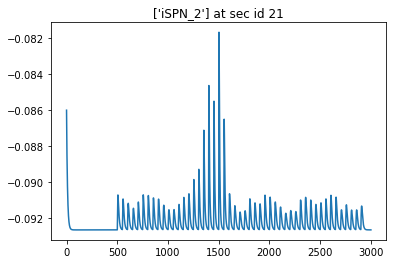

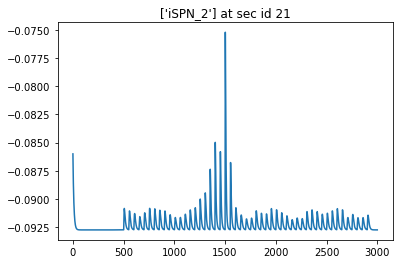

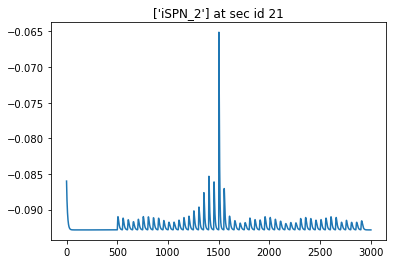

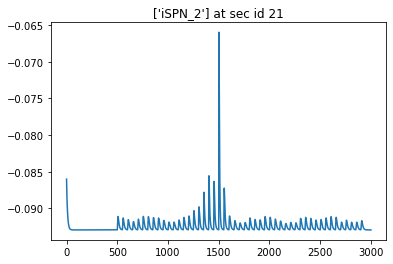

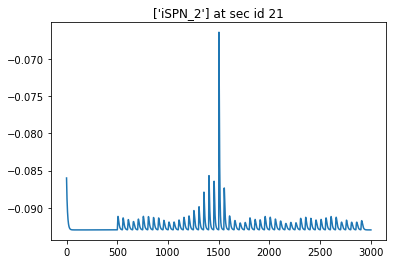

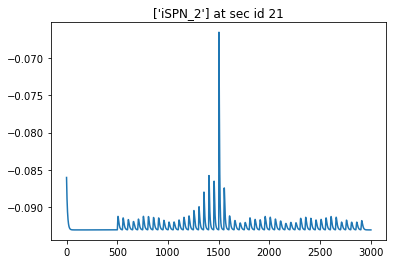

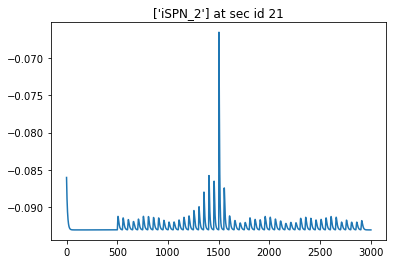

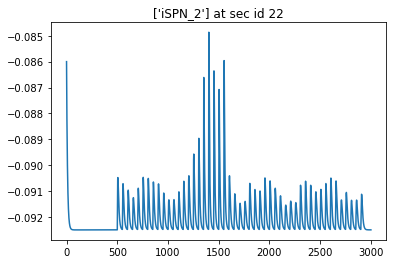

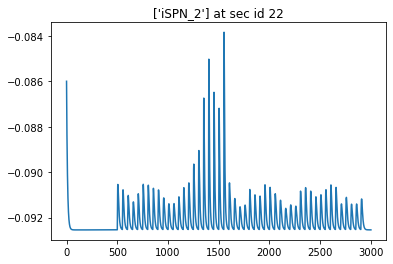

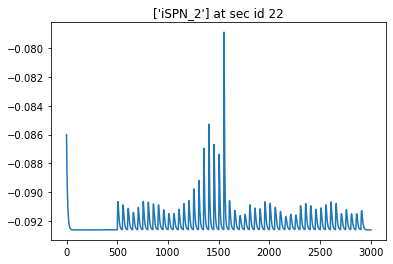

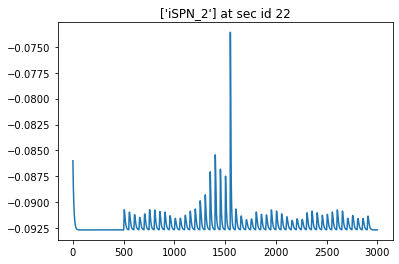

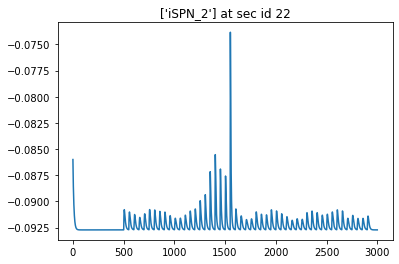

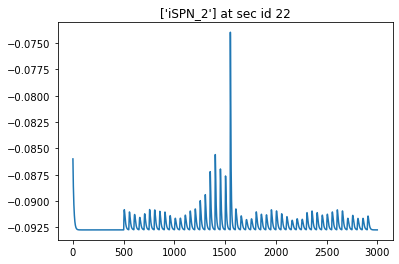

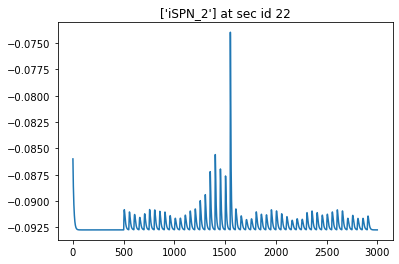

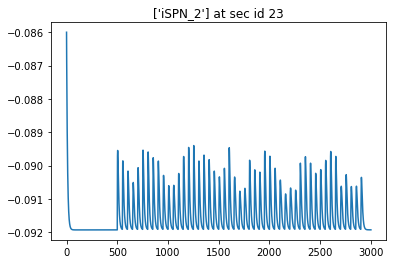

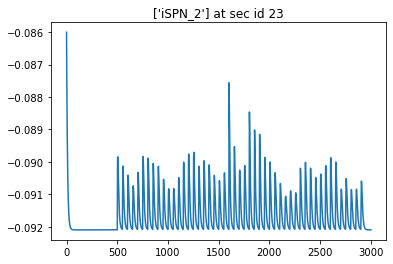

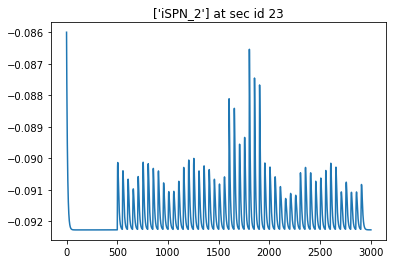

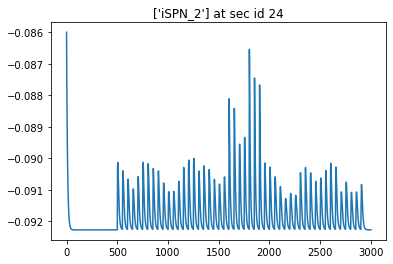

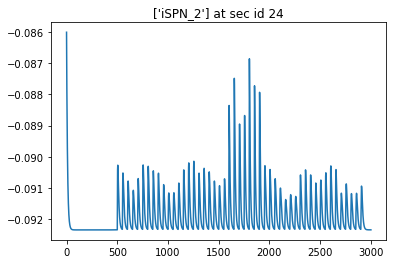

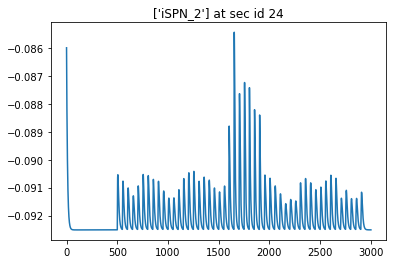

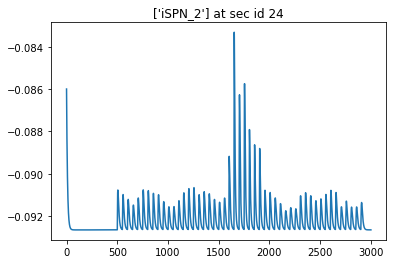

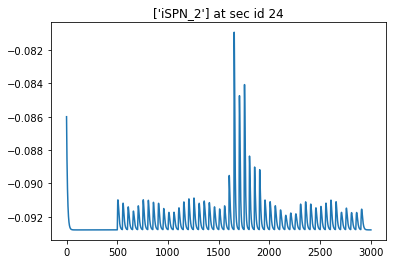

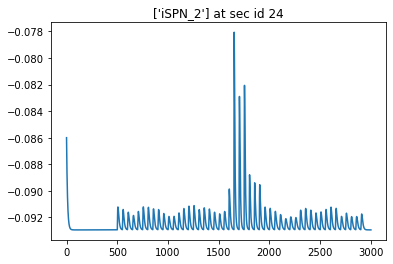

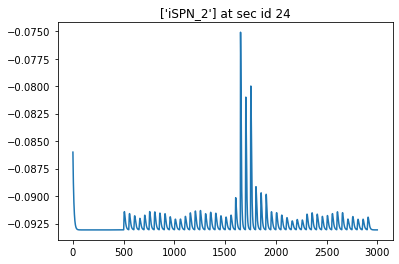

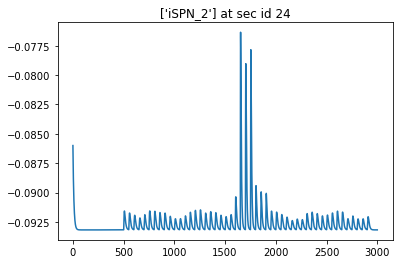

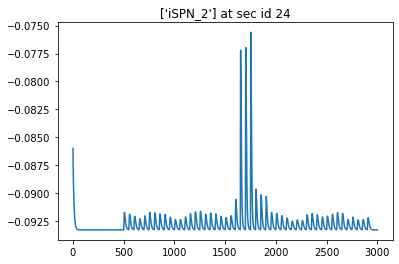

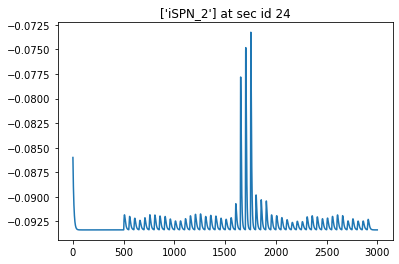

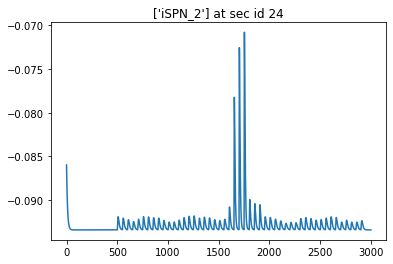

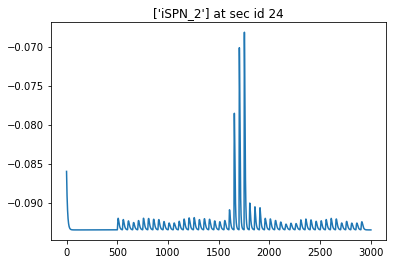

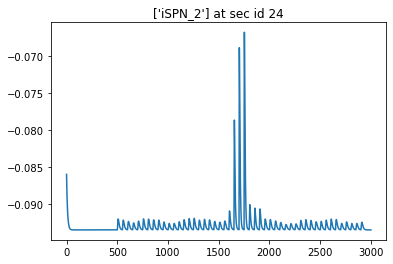

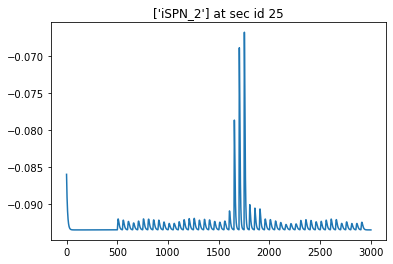

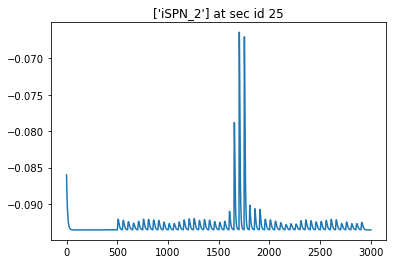

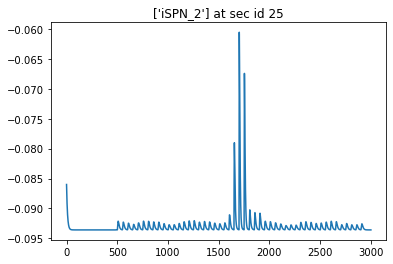

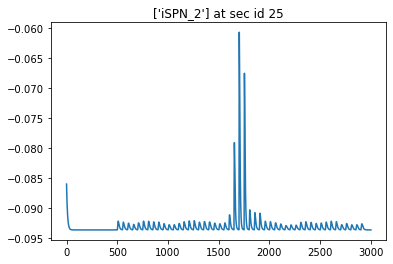

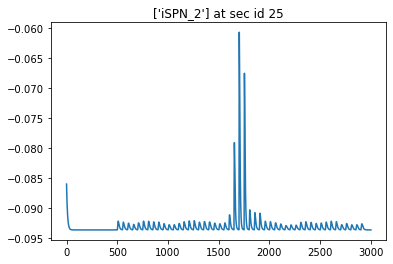

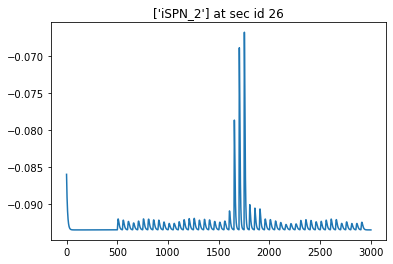

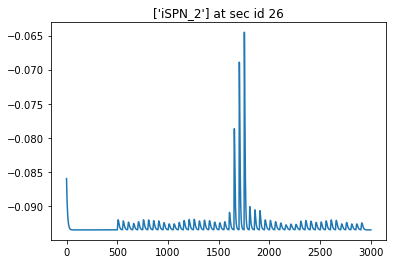

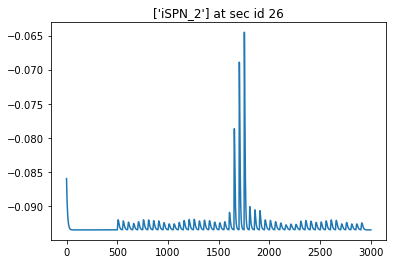

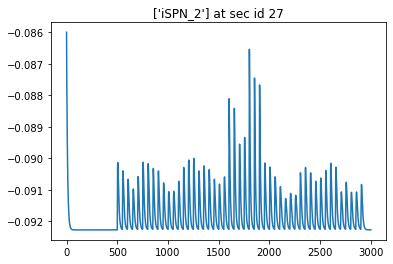

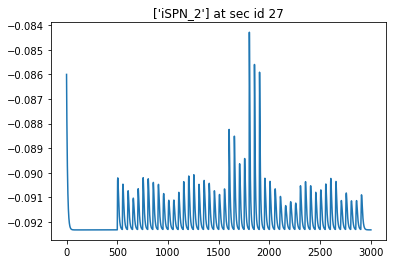

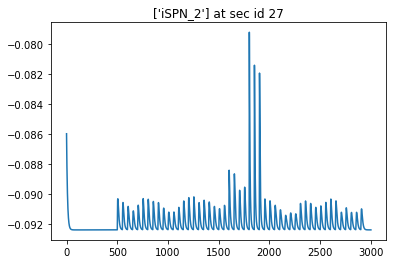

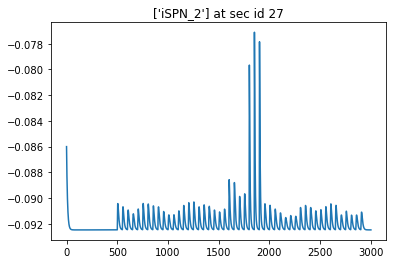

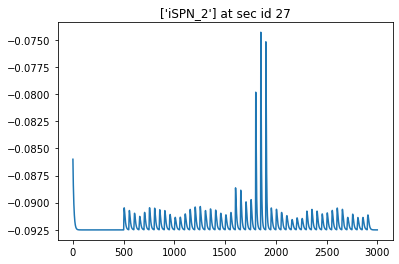

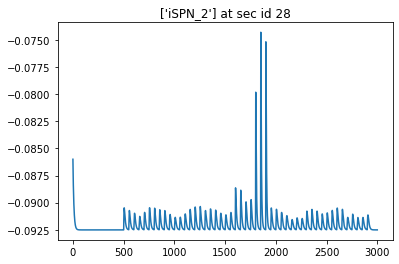

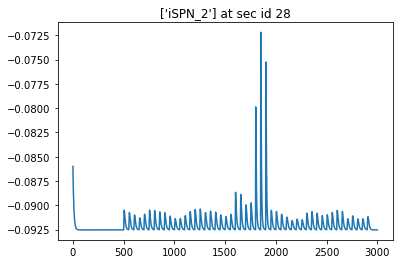

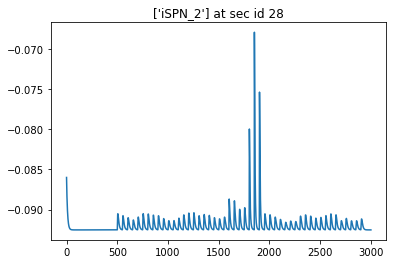

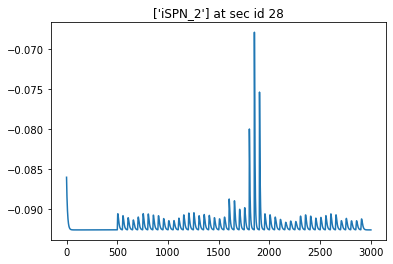

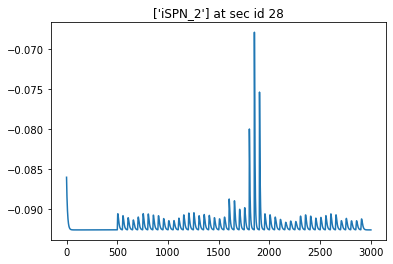

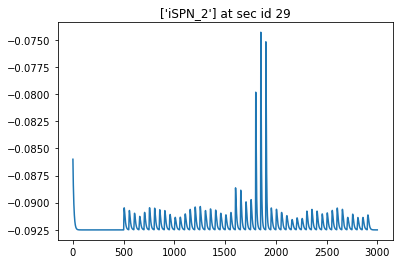

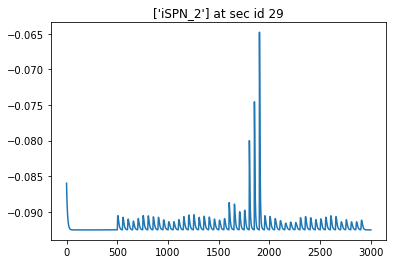

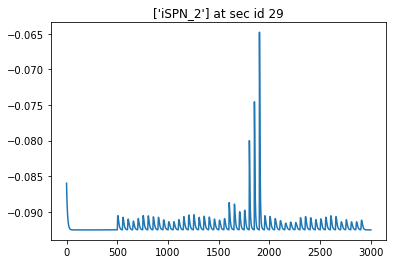

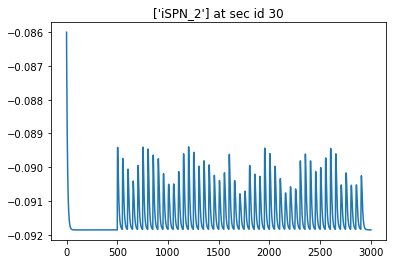

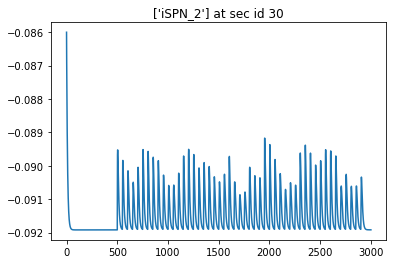

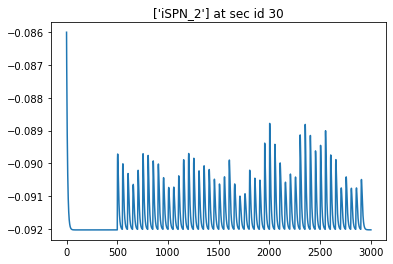

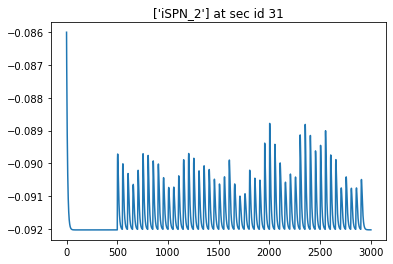

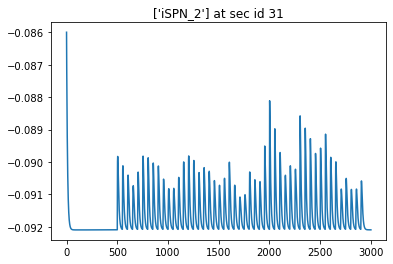

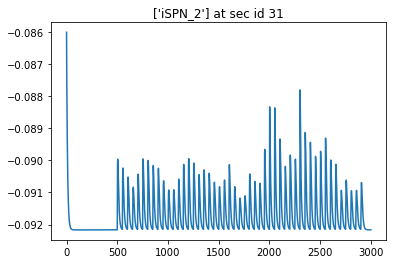

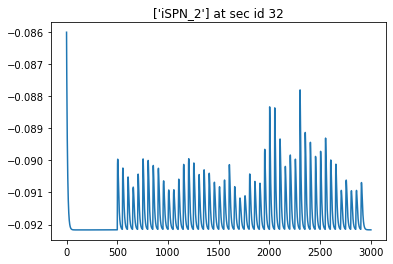

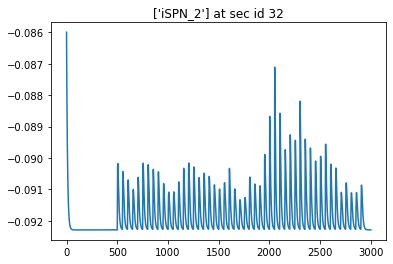

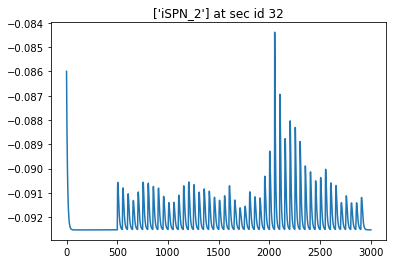

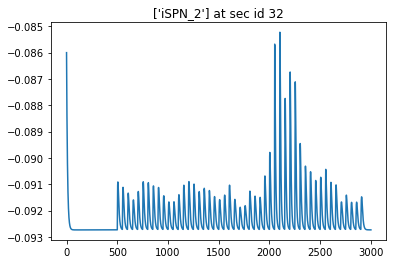

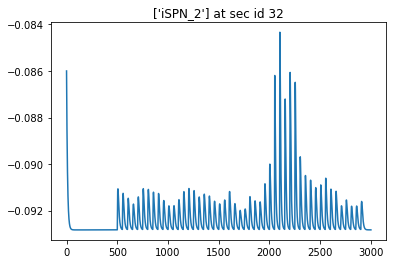

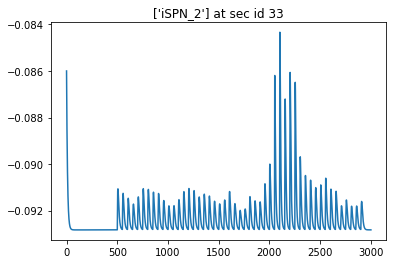

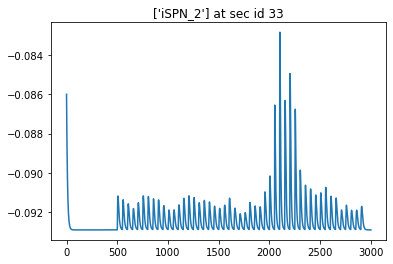

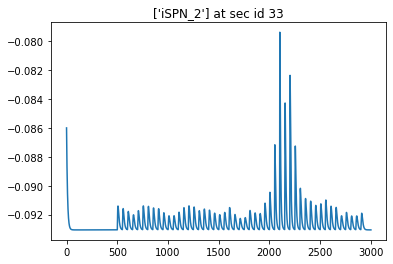

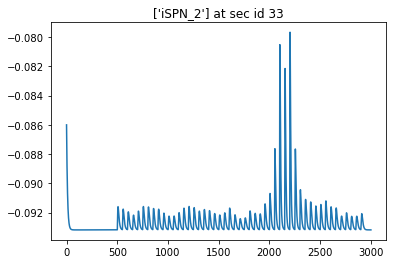

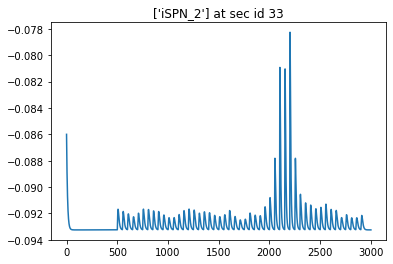

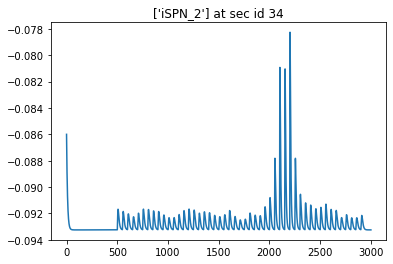

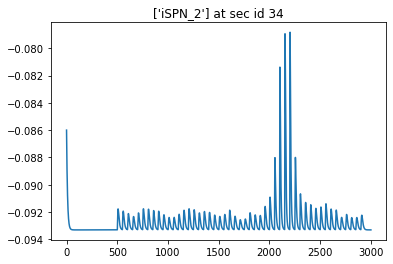

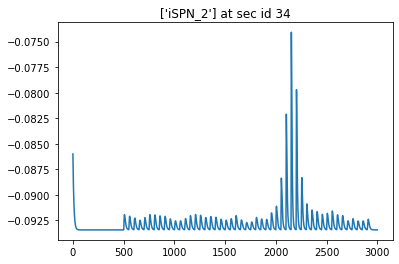

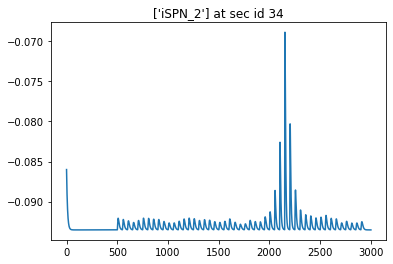

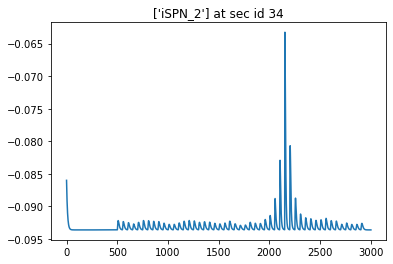

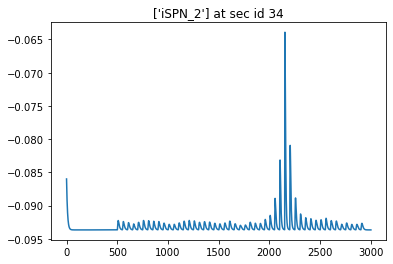

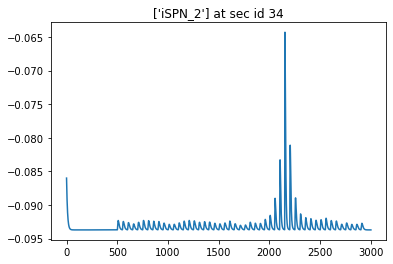

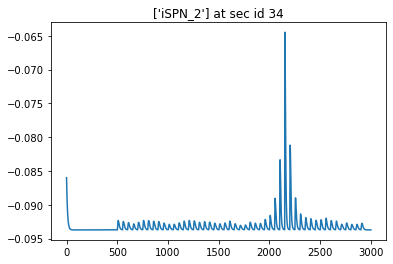

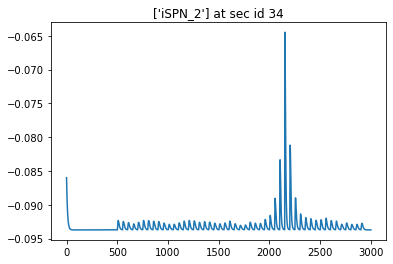

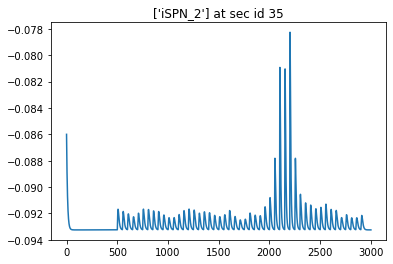

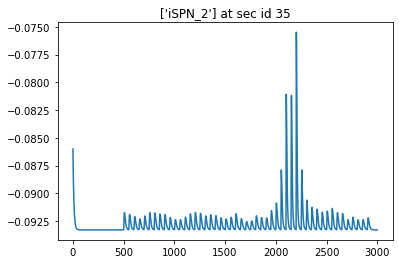

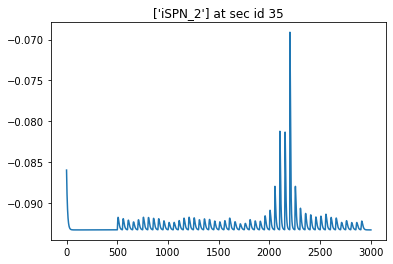

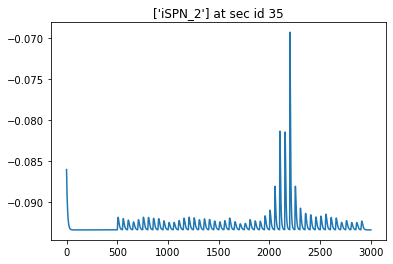

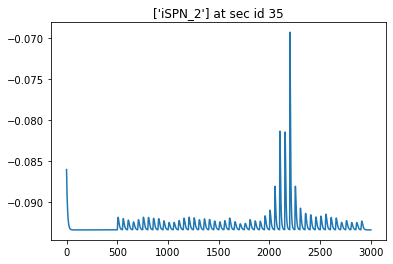

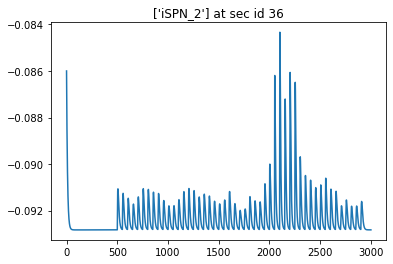

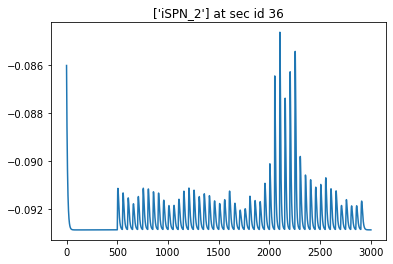

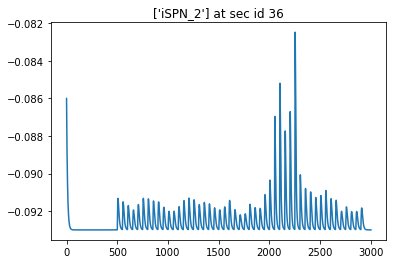

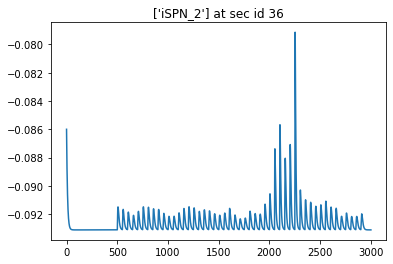

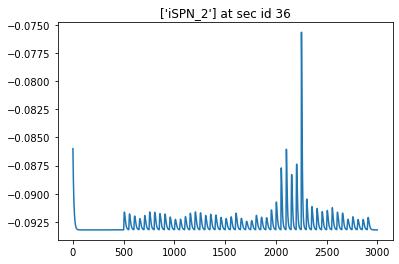

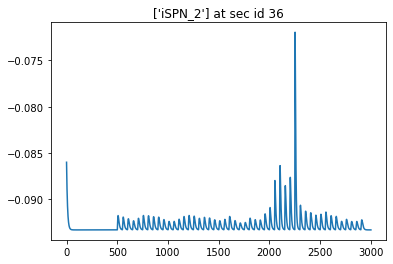

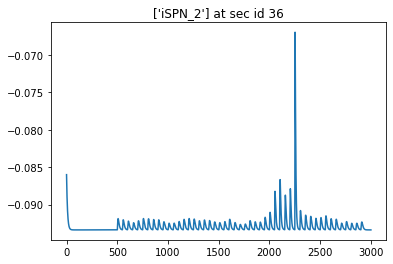

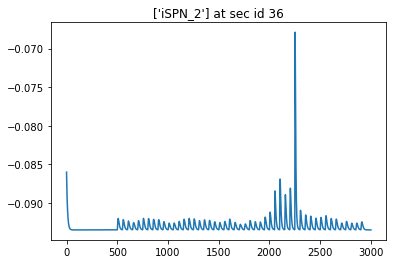

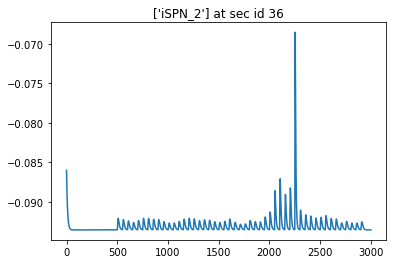

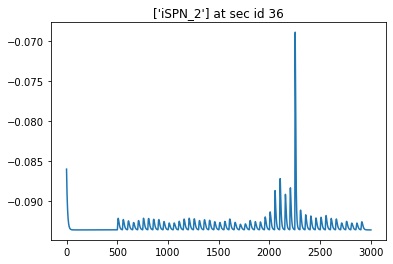

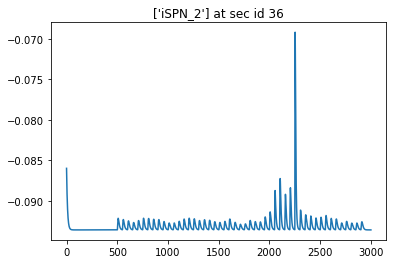

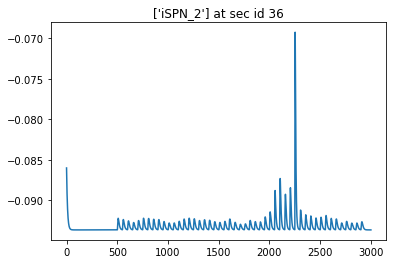

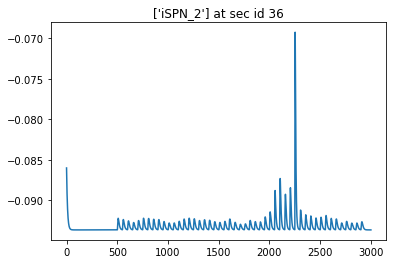

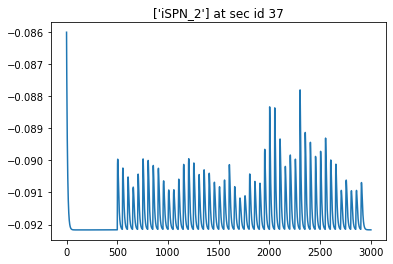

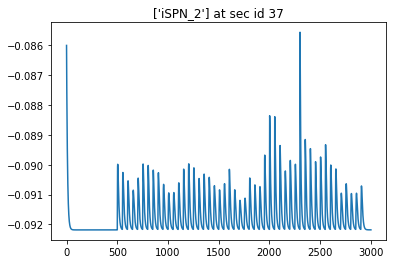

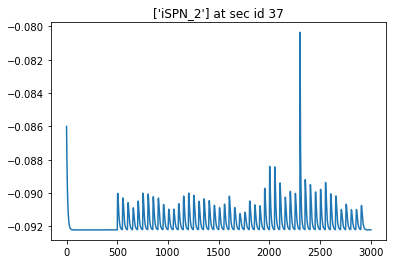

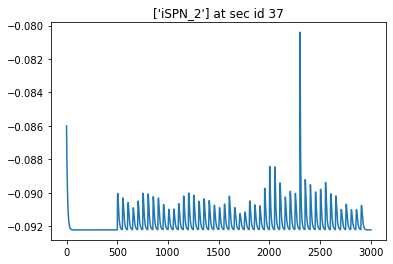

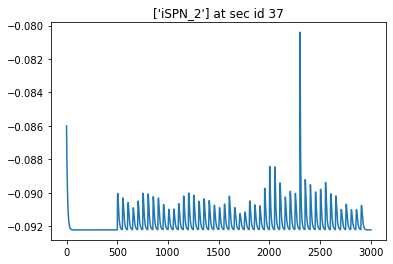

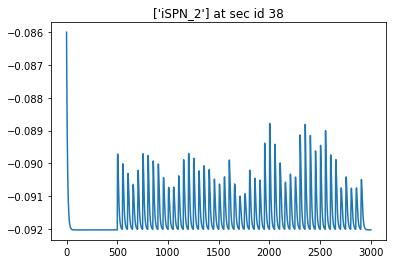

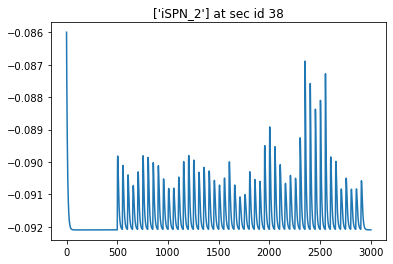

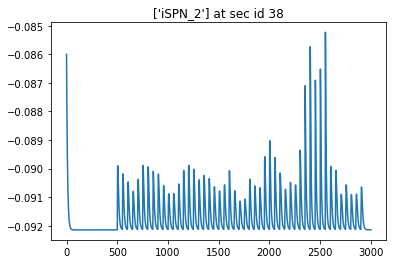

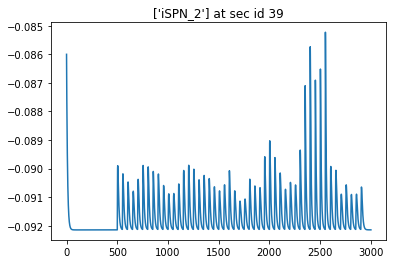

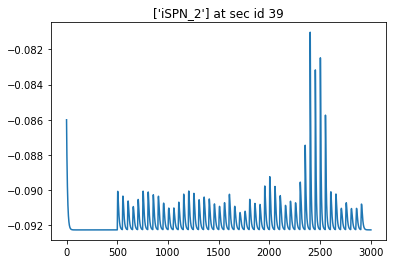

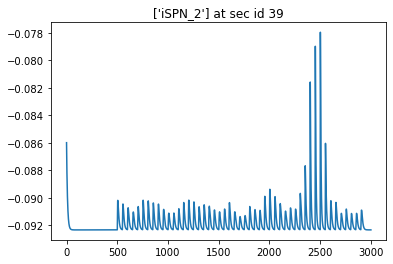

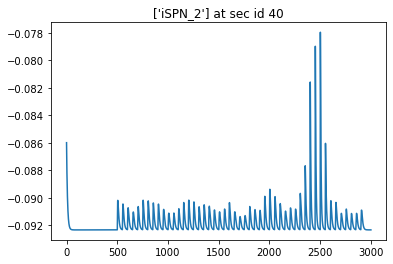

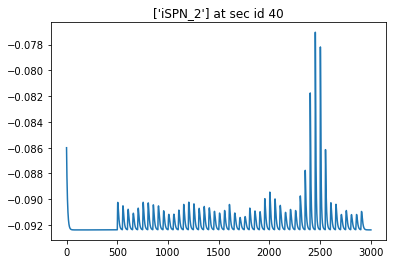

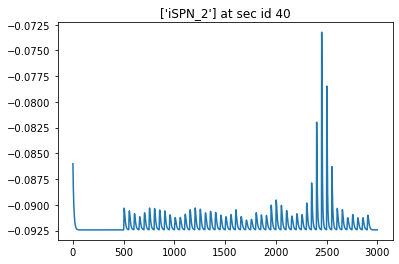

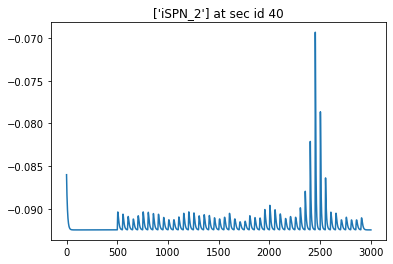

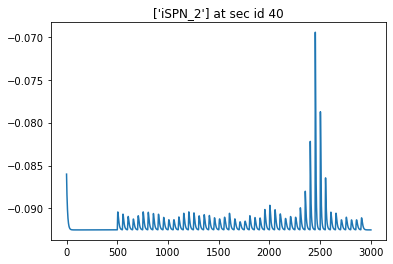

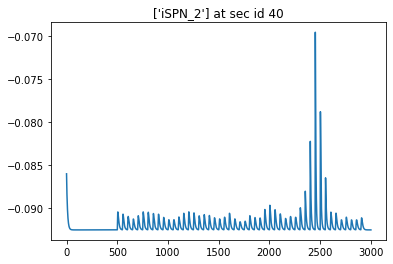

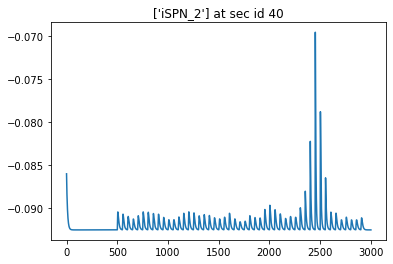

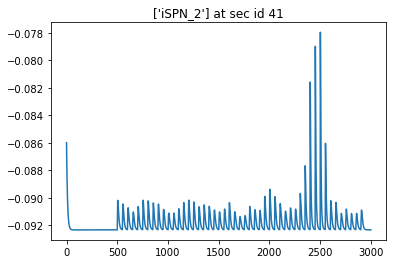

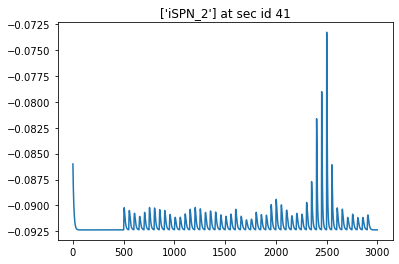

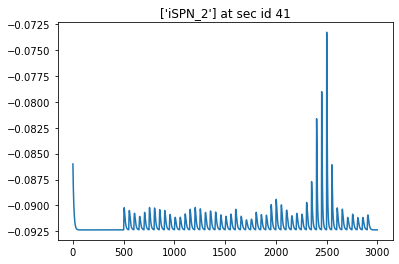

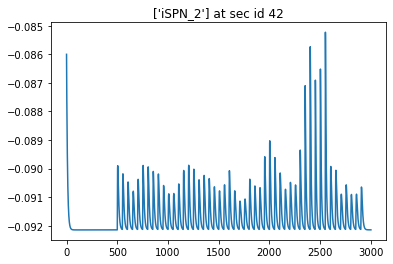

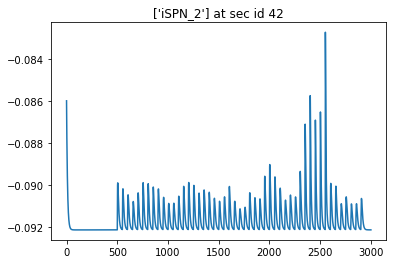

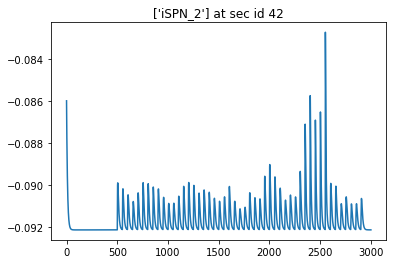

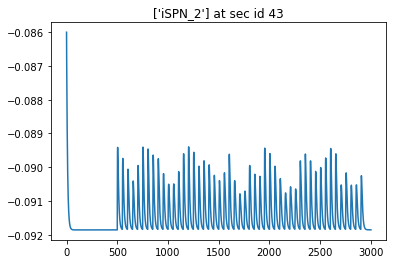

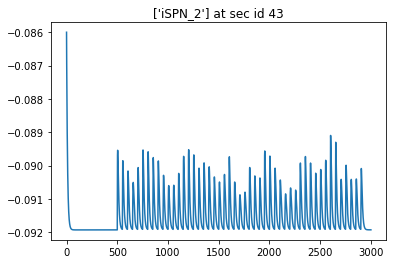

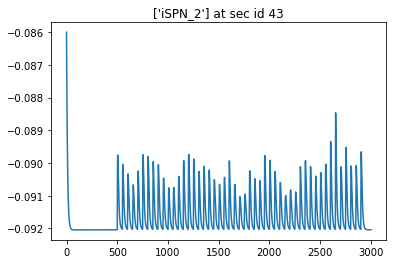

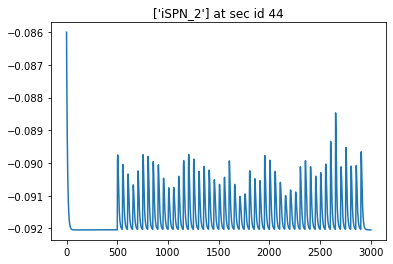

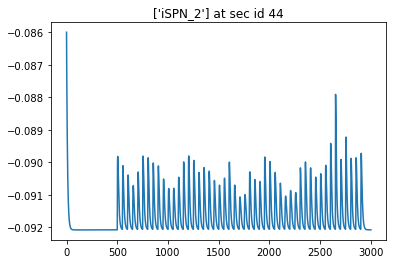

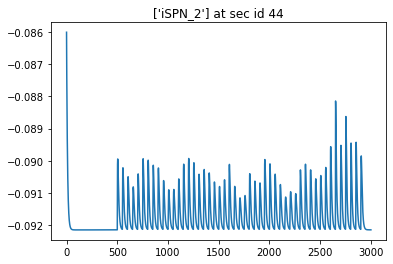

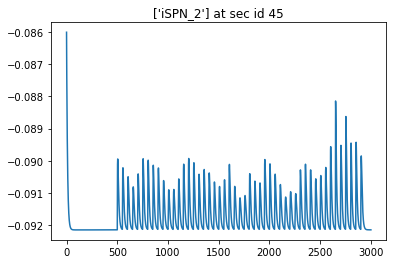

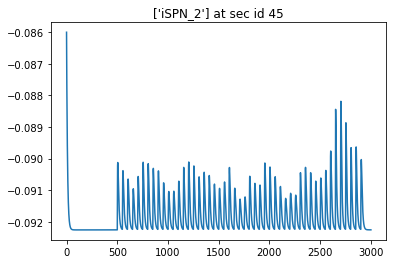

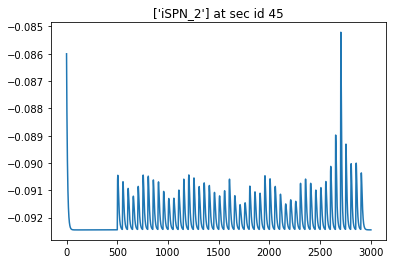

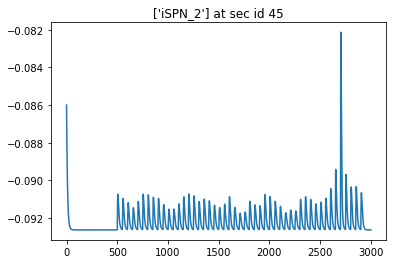

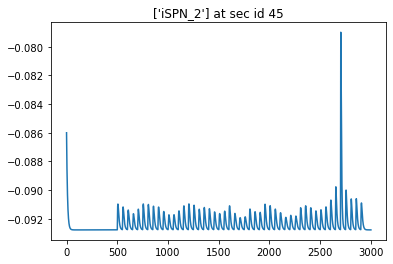

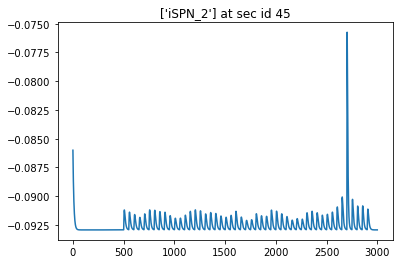

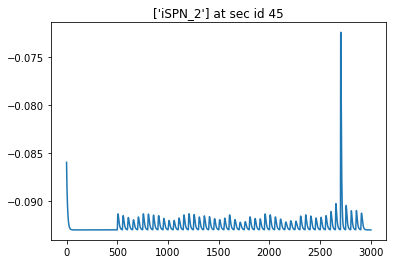

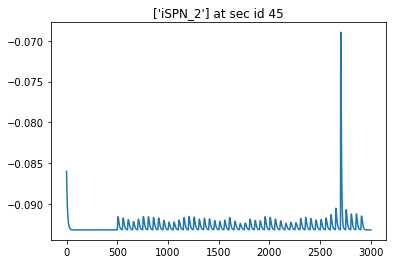

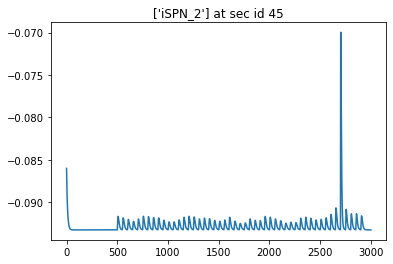

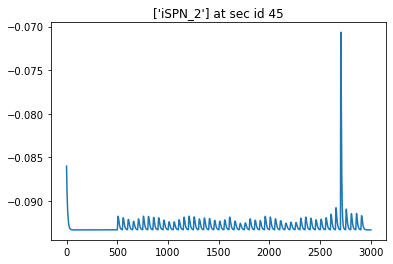

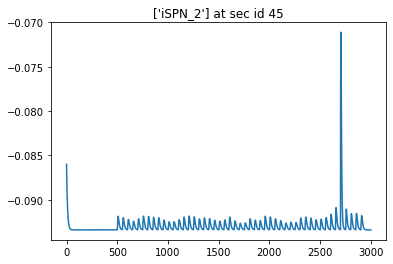

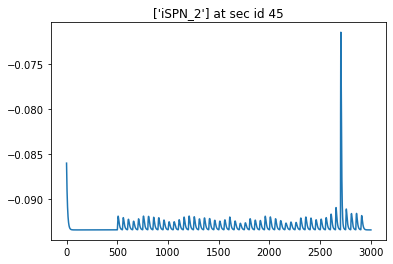

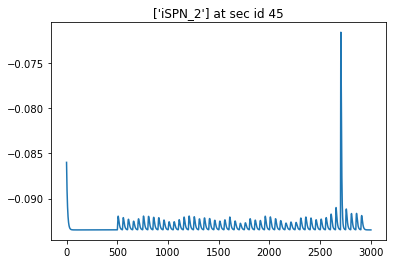

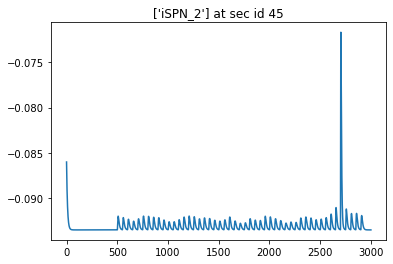

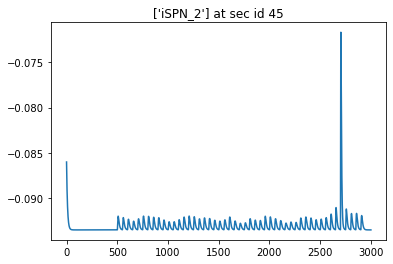

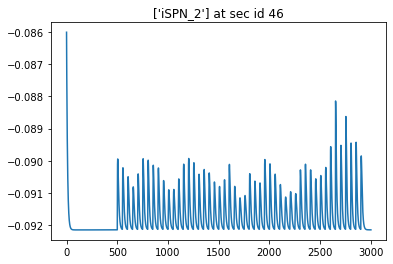

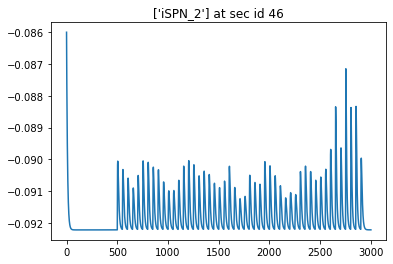

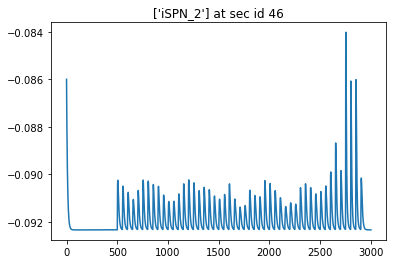

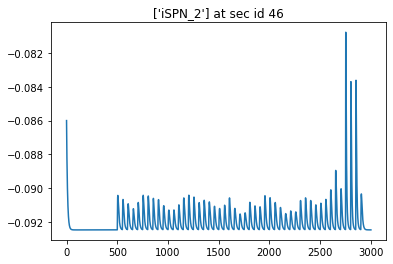

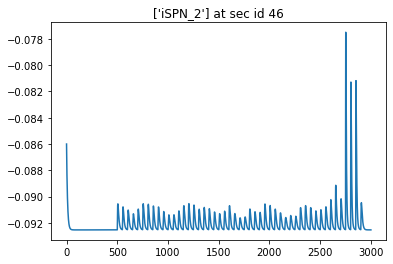

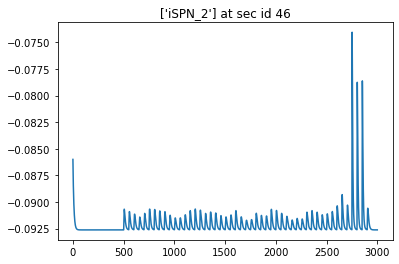

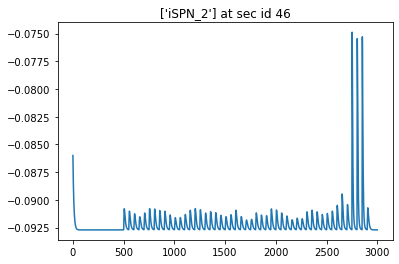

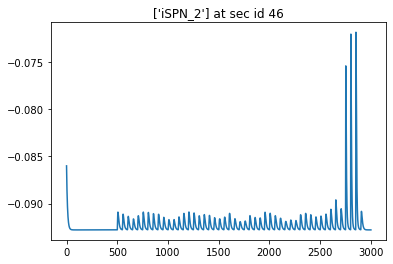

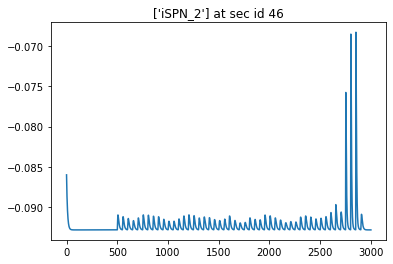

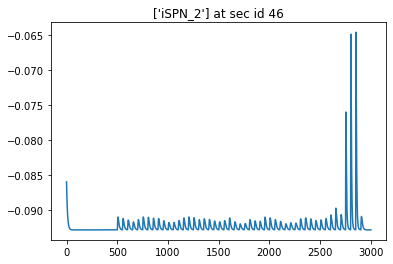

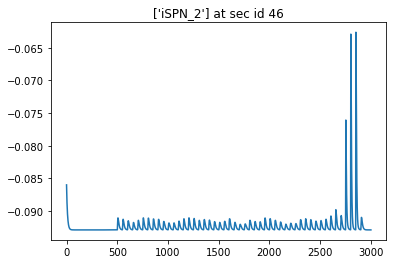

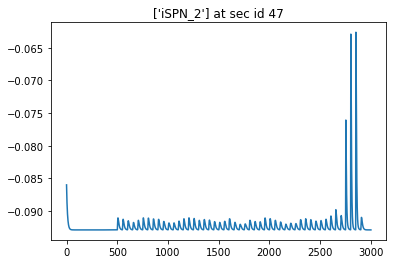

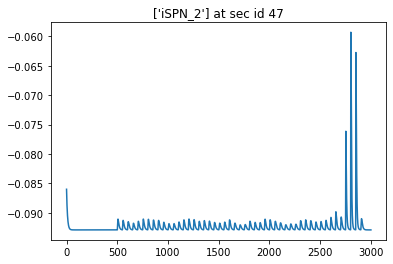

In [ ]:
%%time
for cell_no in range(4):
    
    
    for r, k in enumerate(simulations.keys()):
        sns = simulations[k]
        
        vs = sns.get_voltage(cell_no).T
        sec_id = sns.network_simulation_file['neurons'][str(cell_no)]['voltage']['sec_id'][()]
        for i, v in enumerate(vs):
            plt.figure()
            plt.title(f"{sns.get_neuron_name([cell_no])} at sec id {sec_id[i]}")
            plt.plot(time*1e3,v)  
plt.show()